In [ ]:
#### PACKAGE IMPORTS ####
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax

from google.colab import drive
import os
import cv2
import numpy as np
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#### ENCODE LABEL INTO INDEX ####
def encodeLabel(folder_name, class_names):
  for labelIndex in range(len(class_names)):
    if(folder_name == class_names[labelIndex]):
        return labelIndex


In [ ]:
#### LABEL, RESIZE AND NORMALIZE IMAGES ####
def pre_processing(dataset_path):
  # Load and preprocess the images
  class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
  data = []
  labels = []
  IMAGE_SIZE = (150, 150)

  for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    for img_name in os.listdir(folder_path):
          img_path = os.path.join(folder_path, img_name)
          img = cv2.imread(img_path)
          img = img.astype("float32") / 255.0  # Normalize pixel values between 0 and 1
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = cv2.resize(img, IMAGE_SIZE)
          data.append(img)
          labels.append(encodeLabel(folder_name, class_names))
  return np.array(data), np.array(labels)

In [ ]:
# Preprocess traning data
train_images, train_labels = pre_processing("drive/MyDrive/Self Learning/Projects/Intel Image Classification/images/seg_train/seg_train"
)

#Preprocess testing data
test_images, test_labels = pre_processing("drive/MyDrive/Self Learning/Projects/Intel Image Classification/images/seg_test/seg_test"
)

In [ ]:
# Get image tensor shape
train_images.shape

(14034, 150, 150, 3)

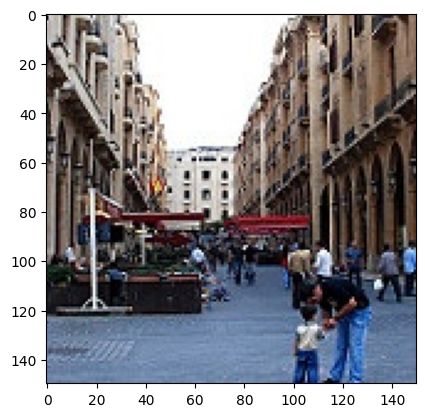

Label of image[2999] = 
1


In [ ]:
#Display an image
imj_index = 2999
imj = train_images[imj_index]
plt.imshow(imj)
plt.show()

print("Label of image" +"["+str(imj_index) +"] = ")
print(train_labels[imj_index])

In [ ]:
# Add a dummy channel dimension

scaled_train_images = train_images[..., np.newaxis]
scaled_test_images = test_images[..., np.newaxis]

In [ ]:
#### Create CNN ####
def get_model(input_shape):
    model = Sequential([
      Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='Same'), # Input Layer
      MaxPooling2D((3, 3)),
      Conv2D(32, (3, 3), activation='relu', padding='Same'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(128, activation = 'relu'),
      Dense(64, activation = 'relu'),
      Dense(16, activation = 'relu'),
      Dense(6, activation = 'softmax') # Output Layer
    ])

    return model

In [ ]:
# Run function to get the model

model = get_model(train_images[0].shape)

In [ ]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
#### COMPILE MODEL ####
def compile_model(model):
    model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
    )



In [ ]:
# Compile the model

compile_model(model)

In [ ]:
#### TRAIN MODEL ####
def train_model(model, scaled_train_images, train_labels):
    history = model.fit(scaled_train_images, train_labels, epochs = 7)
    return history

In [ ]:
# Train the model

history = train_model(model, train_images, train_labels)

Epoch 1/7
439/439 [==============================] - 657s 1s/step - loss: 0.9861 - accuracy: 0.6181
Epoch 2/7
439/439 [==============================] - 622s 1s/step - loss: 0.6536 - accuracy: 0.7613
Epoch 3/7
439/439 [==============================] - 629s 1s/step - loss: 0.5007 - accuracy: 0.8216
Epoch 4/7
439/439 [==============================] - 628s 1s/step - loss: 0.3802 - accuracy: 0.8660
Epoch 5/7
439/439 [==============================] - 629s 1s/step - loss: 0.2714 - accuracy: 0.9042
Epoch 6/7
439/439 [==============================] - 621s 1s/step - loss: 0.1763 - accuracy: 0.9402
Epoch 7/7
439/439 [==============================] - 616s 1s/step - loss: 0.1401 - accuracy: 0.9514


In [ ]:
# Load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

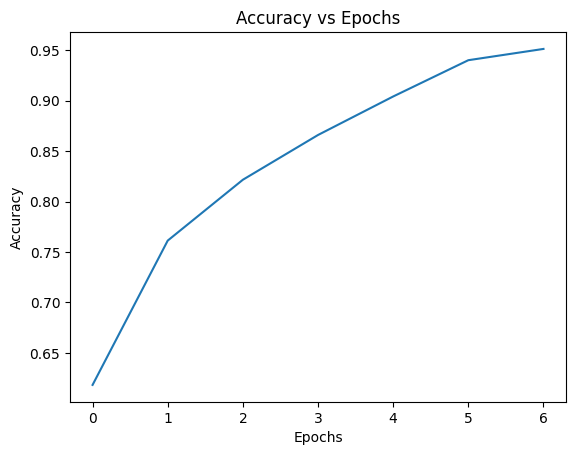

In [ ]:
# Make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

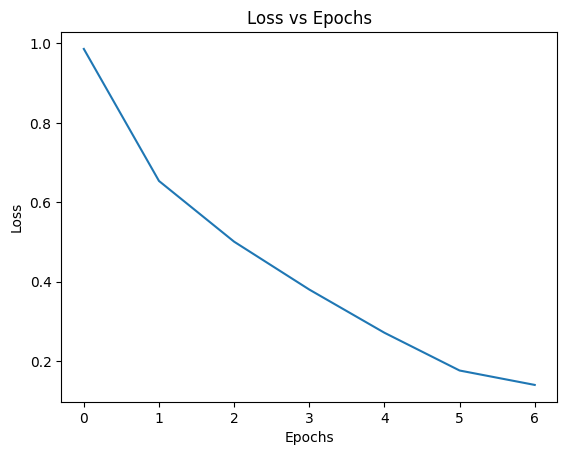

In [ ]:
# Make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [ ]:
#### EVALUATE MODEL ####
def evaluate_model(model, scaled_test_images, test_labels):
    return model.evaluate(scaled_test_images, test_labels)



In [ ]:
# Evaluate the model

test_loss, test_accuracy = evaluate_model(model, test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 37s 389ms/step - loss: 0.7898 - accuracy: 0.7933
Test loss: 0.7897916436195374
Test accuracy: 0.7933333516120911


In [ ]:
# Save model
model.save("drive/MyDrive/Self Learning/Projects/Intel Image Classification/model/model_0.79")

In [ ]:
#### LOAD DATA ####
def loadData(folder_path):
  data = []
  IMAGE_SIZE = (150, 150)
  for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = img.astype("float32") / 255.0  # Normalize pixel values between 0 and 1
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMAGE_SIZE)
        data.append(img)





  return np.array(data)



In [ ]:
pred_images = loadData("drive/MyDrive/Self Learning/Projects/Intel Image Classification/images/predictSet/predictSet")

1/1 [==============================] - 0s 57ms/step


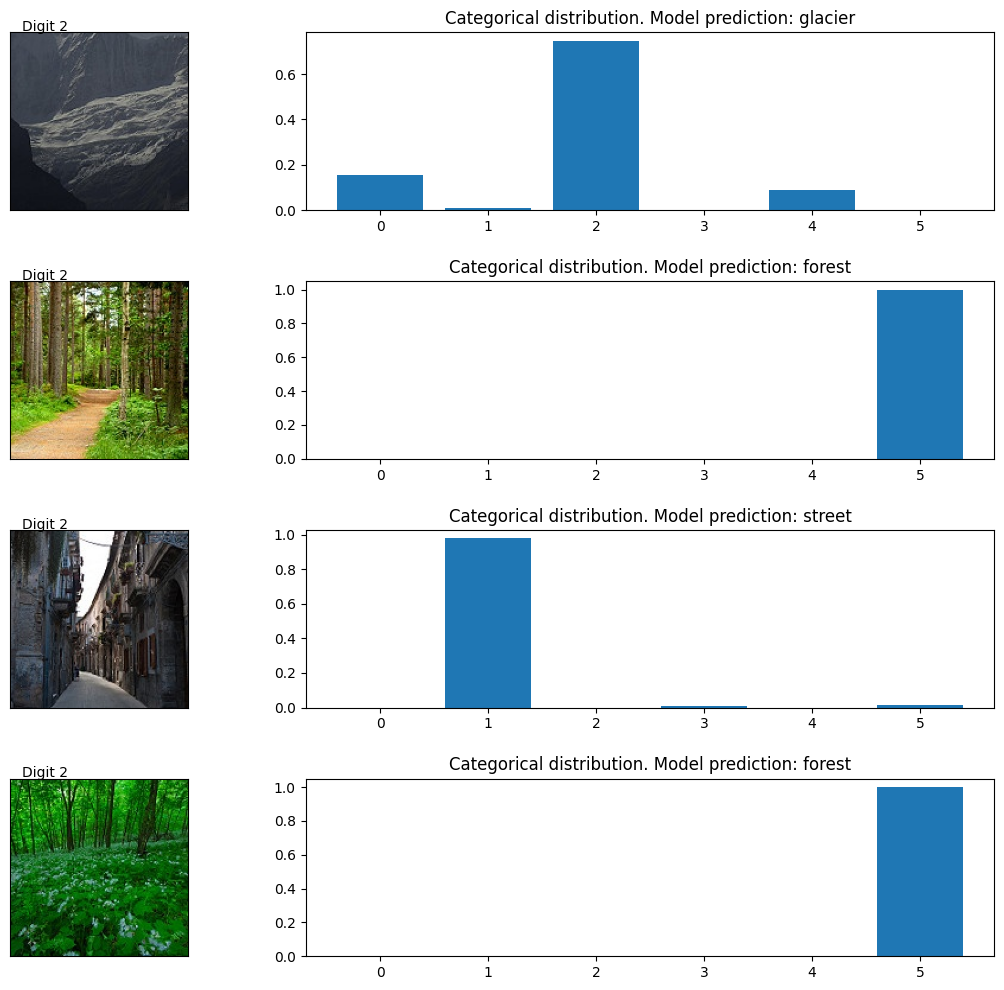

In [ ]:
# Get model predictions on randomly selected test images
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
num_test_images = 21

random_inx = np.random.choice(num_test_images, 4)
random_test_images = pred_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {class_names[np.argmax(prediction)]}")

plt.show()